In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Mean Squared Error: 2848523443.419101
R^2 Score: 0.6286307301050608

Model Coefficients:
                Coefficient
GrLivArea       100.636895
BedroomAbvGr -26645.532516
TotalBath     27083.207713


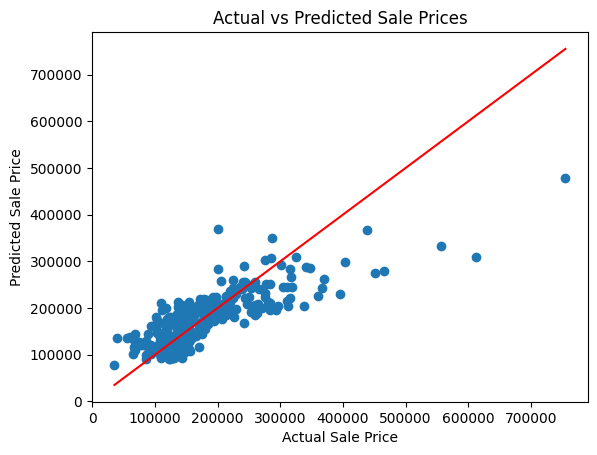

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# Select relevant features
# 'GrLivArea' = above-ground living area in square feet
# 'BedroomAbvGr' = number of bedrooms
# 'FullBath' = full bathrooms
# 'HalfBath' = half bathrooms (we'll convert this into 0.5 bathrooms)
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']
features = df[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
target = df['SalePrice']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Show coefficients
coeff_df = pd.DataFrame(model.coef_, features.columns, columns=["Coefficient"])
print("\nModel Coefficients:\n", coeff_df)

# Optional: Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()
